# Practical statistics for data scientists

https://github.com/gedeck/practical-statistics-for-data-scientists


## Chapter 1 - Exploratory Data Analysis

https://www.kaggle.com/arjunprasadsarkhel/2021-olympics-in-tokyo


## Estimates of location - Measure of Centre


In [1]:
import pandas as pd


In [2]:
medal_count = pd.read_excel('C:/Users/Administrator/Documents/projects/statistics/CHAPTER 1/Medals.xlsx')

C:\ProgramData\Anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [3]:
medal_count

,Rank,Team/NOC,Gold,Silver,Bronze,Total,Rank by Total
0,1,United States of America,39,41,33,113,1
1,2,People's Republic of China,38,32,18,88,2
2,3,Japan,27,14,17,58,5
3,4,Great Britain,22,21,22,65,4
4,5,ROC,20,28,23,71,3
...,...,...,...,...,...,...,...
88,86,Ghana,0,0,1,1,77
89,86,Grenada,0,0,1,1,77
90,86,Kuwait,0,0,1,1,77
91,86,Republic of Moldova,0,0,1,1,77


In [4]:
# Mean: Sum of all values divided by number of values
medal_count['Total'].mean()


11.612903225806452

In [5]:
## weighted mean: same as mean, except you multiply every valye by some xi before adding them up 
## and dividing by the number of instances
## not all instances are equally valuable so we might want to add or subtract weight

import numpy as np

np.average(medal_count['Total'], weights = medal_count['Gold'])

46.832352941176474

In [6]:
## Trimmed Mean: Remove the top and bottom x values from the dataset then calculate the mean
## Helps reduce the impact of outliers. Used in international diving competitions where the top and bottom scores
## aren't counted when calculating a diver's mean score

from scipy.stats import trim_mean
trim_mean(medal_count['Gold'], 0.1)

## Robust : A robust metric is one which is not sensitive to outliers

1.96

In [7]:
# Median: The middle valye in a sorted list values
medal_count['Total'].median()

4.0

In [8]:
## Weighted mean: We multiply every value with some weight xi and then pick the middle value such that
## the sum of values to the left of the median are the same as the sum of values to the rights of the median

## You can use the wquantiles package they mention in hte book, but i'd prefer to redyce the number of packages
## that I download in my environments so I found the website with a methodology to do weighted medians using just pandas

# https://newbedev.com/python-weighted-median-algorithm-with-pandas

def weighted_median(df, median_col, weight_col):
    df_sorted = df.sort_values(median_col)
    cumsum = df_sorted[weight_col].cumsum()
    cutoff = df_sorted[weight_col].sum() / 2.
    return df_sorted[cumsum >= cutoff][median_col].iloc[0]

weighted_median(medal_count, 'Total', 'Gold')

40

In [9]:
## Percentile: the value such that P percnet of the data lies below it
q3 = np.percentile(medal_count['Total'], 75)
q3

11.0

In [10]:
medal_count.describe()

,Rank,Gold,Silver,Bronze,Total,Rank by Total
count,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000
mean,46.333333,3.655914,3.634409,4.322581,11.612903,43.494624
std,26.219116,7.022471,6.626339,6.210372,19.091332,24.171769
min,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,24.000000,0.000000,0.000000,1.000000,2.000000,23.000000
50%,46.000000,1.000000,1.000000,2.000000,4.000000,47.000000
75%,70.000000,3.000000,4.000000,5.000000,11.000000,66.000000
max,86.000000,39.000000,41.000000,33.000000,113.000000,77.000000


# Estimates of variability(dispersion metrics)-Measure of spread or Dispersion

Variability is at the heart of statistics and where a lot of information on a dataset can be gleaned

Deviations: The difference between observed values and the estimate of location, also called errors or Residuals

In [11]:
# Variance: square the deviation, from the mean, divide by n-1 where n is the number of instances

from statistics import variance
variance(medal_count['Total'])

364.47896213183736

In [12]:
# Standard Deviation: Square root of variance
from statistics import stdev
stdev(medal_count['Total'])

19.091332120411014

In [13]:
# Mean absolute deviation : mean of the absolute value of the deviations from the mean, also know as l1 norm or manhattan norm

from numpy import mean, absolute

mean(absolute(medal_count['Total'] - mean(medal_count['Total'])))

11.602497398543184

In [14]:
# median absolute deviation from the median: Median of the absolute values of the deviation from the median

from numpy import median, absolute

mean(absolute(medal_count['Total'] - median(medal_count['Total'])))

9.311827956989248

In [15]:
# Range: difference betweet the largest and smallest values in the dataset
# order statistics: Metrics based on the data values sorted from smallest to biggest
# Percentile: The values which is greater than P percent of values in the dataset
# Interquartile Range: Difference between the 75th and 25th percentile

q3, q1 = np.percentile(medal_count['Total'], [75,25])

iqr = q3 - q1

iqr

9.0

## Standard Deviation and related estimates

Mean absolute deviation is one method to measure variability. It is simply the sum of the absolute values
of all deviations(values-mean) divided by the number of instances.

Other metrics include the variance and standard deviation, The variance is an average of squared deviations,
and the standard deviation is the square root of variance.

One reason that people tend to prefer the standard deviation to the variance, is that the standard deviation
operates  on the same scale as the rest of the data.

All three of these metrics are not robust against ouliers and the variance and standard deviation are particularly
susceptible to outliers because of how they square their deviations.

The median absolute deviation is robust agains outliers and is calculated by taking the median of the absolute
value of all values - the median

@ the variance, standard deviation, mean absolute deviation, and median absolute deviation are not equivalent estimates,
  Standard deviatio > mean absolute deviation > median absolute deviation.
  
  You can compare the median absolute deviation with the standard deviation for a normal deviation 
  by multiplying by a factor of 1.4826.

# Estimates Based on Percentile

Another method of measuring dispersion is looking at the spread of sorted data. Statistics based on sorted data are
called order statistics. 

The range is the most common of these statistics and is simply the maximum value minus the 
minimum value. This is incredibly sensitive to outliers, so avoid this we typically take statistics that ignore the 
highest and lowest percentile values. 

The Interquartile Range is the most famous of these statistics and is the 75th percentile minus the 25th percentile.

For every large datasets, it can get computationally intensive to calculate these statistics because it requires
sorting the data, so a machine learning algorithm might estimate these statistics.

# Exploring the Data Distribution 

## Percentiles and Boxplots

Percentiles are great way to summarize the tails of a distribution such as the ntop 1%

You can also construct box plots which are a tremendous way to visually summarize the distribution of data in a dataset



<AxesSubplot:>

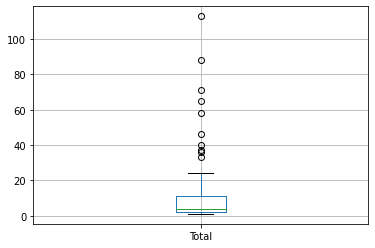

In [16]:
medal_count.boxplot(column='Total', by=None, ax=None)

## Frequency tables and Histograms

Frequency tables divede the values of a vatiale into equall spcaed segments, and quantify the number of observations
in each segment(basically a histogram not visuvalized)


https://towardsdatascience.com/histograms-and-density-plots-in-python-f6bda88f5ac0

In [17]:
frequency_table = medal_count.copy()
frequency_table['freq']=pd.cut(medal_count['Total'], 10)
frequency_table.groupby('freq')['Rank'].count().reset_index()

,freq,Rank
0,"(0.888, 12.2]",72
1,"(12.2, 23.4]",10
2,"(23.4, 34.6]",2
3,"(34.6, 45.8]",3
4,"(45.8, 57.0]",1
5,"(57.0, 68.2]",2
6,"(68.2, 79.4]",1
7,"(79.4, 90.6]",1
8,"(90.6, 101.8]",0
9,"(101.8, 113.0]",1


(array([47., 18.,  7.,  4.,  5.,  2.,  0.,  0.,  1.,  2.,  1.,  1.,  0.,
         0.,  1.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
         0.,  0.,  1.]),
 array([  1.        ,   4.86206897,   8.72413793,  12.5862069 ,
         16.44827586,  20.31034483,  24.17241379,  28.03448276,
         31.89655172,  35.75862069,  39.62068966,  43.48275862,
         47.34482759,  51.20689655,  55.06896552,  58.93103448,
         62.79310345,  66.65517241,  70.51724138,  74.37931034,
         78.24137931,  82.10344828,  85.96551724,  89.82758621,
         93.68965517,  97.55172414, 101.4137931 , 105.27586207,
        109.13793103, 113.        ]),
 <BarContainer object of 29 artists>)

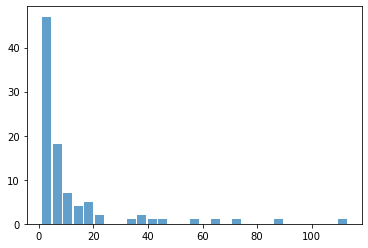

In [18]:
# histogram
import matplotlib.pyplot as plt
plt.hist(x = medal_count['Total'], bins = 'auto', alpha = 0.7, rwidth=0.85)

# Statistical moments

Moments are a set of statistical parameters to measure a distribution, four moments are commonly used: 

First Moment is location(mean): Average of all the data

Second Moment is Variability: How closely values are spread aroung the mean(or another measure of central tendancy)

Third Moment is Skewness: Direction of the tail of the data - discoverd through visualization not a metric
    It is often approximated by Skew = (Mean - Median) / (Std dev).
    If skewness is positive, the mean is bigger than the median and the distribution has a large tail of high values.
    If skewness is negative, the mean is smaller than the median and the distribution has a large tail of small values.

Fourth moment is Kurtosis: Propensity for data to have extreme values - discovered through visualization not a metric
    Positive kurtosis indicates a thin pointed distribution.
    Negative kurtosis indicates a broad flat distribution.

https://www.usna.edu/Users/oceano/pguth/md_help/html/moment_stats_2.htm

## Density plots and estimates
A Density plot is a smoothed histogram and shows the distribution of data values as a continous line and the y-axis is plotted as a proportion, The proportion part is the key difference here and the reason that density plots are not the same as histograms

Text(0.5, 0, 'Total medal gain by countries')

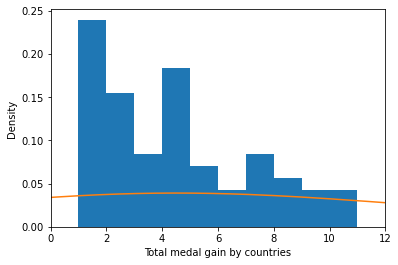

In [19]:
ax = medal_count['Total'].plot.hist(density = True, xlim = [0,12], bins = range(1,12))
medal_count['Total'].plot.density(ax = ax)
ax.set_xlabel('Total medal gain by countries')

# Exploring Binary and Categorical Data

Mode: Value that appears the most ofter

Expected value: Sum of each value multiplied by the probability of occurrence

Bar charts: Plots each variable against its frequency or proportion

In [20]:
# mode

medal_count['Total'].mode()

0    1
dtype: int64

In [21]:
# expected values

Text(0, 0.5, 'Total Medals')

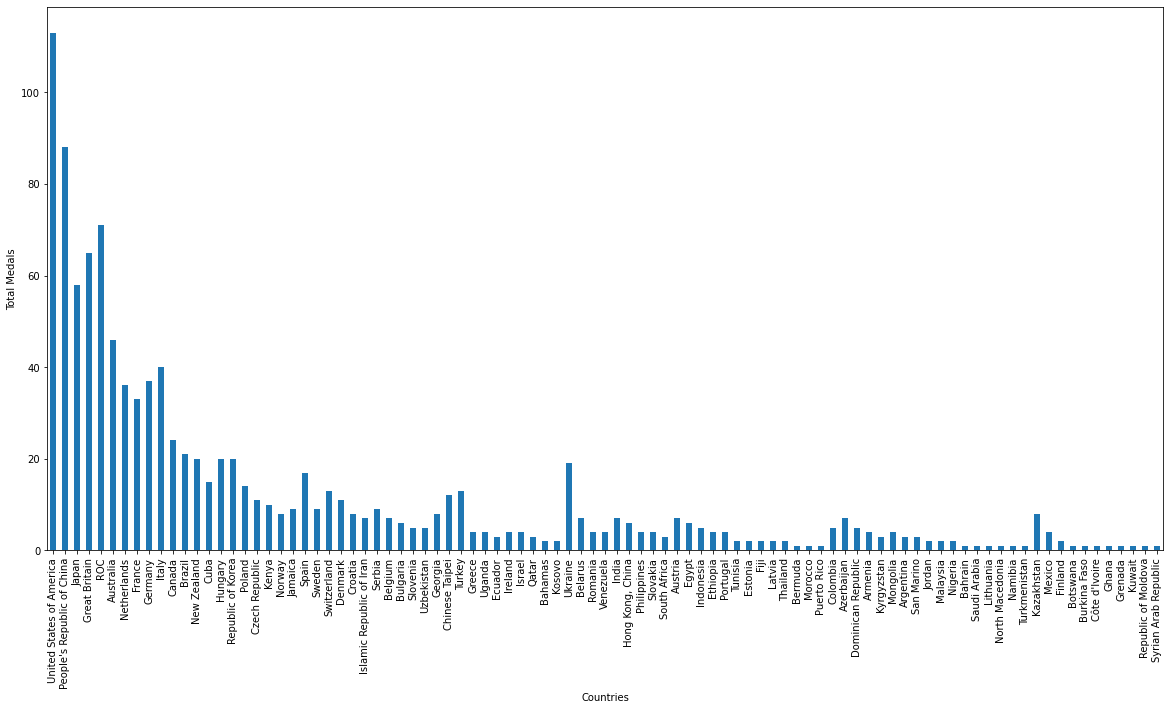

In [22]:
# Barcharts
ax = medal_count.plot.bar(x = "Team/NOC", y = 'Total',figsize = (20,10), legend = False)
ax.set_xlabel('Countries')
ax.set_ylabel('Total Medals')

Text(0, 0.5, 'Total Medals')

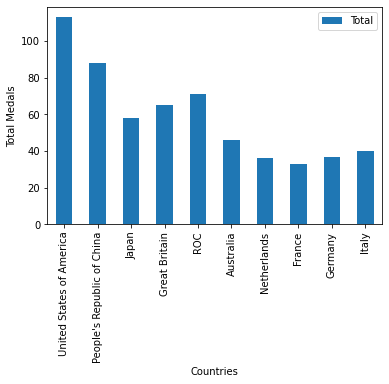

In [23]:
ax = medal_count.iloc[:10, :].plot.bar(x = "Team/NOC", y = 'Total', legend = True)
ax.set_xlabel('Countries')
ax.set_ylabel('Total Medals')

### Probabilities are another way to describe categorical or binary data by grouping each variable with its likelihood of being chosen(proportion of the entire dataset)

# Covariance Estimates

Many statistical problems require the estimation of a population's covariance matrix. Which can be seen as an estimation of data set scatter plot shape

https://scikit-learn.org/stable/modules/covariance.html

# Exploring Two of more variables

Means and variance are a form of univariate analysis, correlation is a form of bivariate analysis, and methods that look at more than two variables simultaneously are called multivariate analysis, After analyzing individual variables, you will usuall want to see how variables interact with one another. When deciding which method to use, you must first determine whether you are comparing numerical variables to one another, numerical vs categorical variables, or categorical varibles to one another

Contigency table: tally counts between tow or more variables

Hexagonal binning: Plots of two numeric variables with records binned into hexagons

Contour plot: Plots showing density of two numeric variables similar to a topographical map

Violin plot: box plot for density estimates


# Correlation

Correlation Coefficient: Generally use Pearson's correlation coefficient. The PCC is sensitive to outliers, This measure how change in one variable will change another variable. It is very useful to check how variables are related with each other.

Correlation Matrix: Show the correlation between all variables in a dataset. The primary diagonal will be 1's the engire way down

In [24]:
#correlation matrix
medal_count.corr()

,Rank,Gold,Silver,Bronze,Total,Rank by Total
Rank,1.000000,-0.655477,-0.597835,-0.637166,-0.655877,0.873539
Gold,-0.655477,1.000000,0.929046,0.862425,0.970840,-0.626012
Silver,-0.597835,0.929046,1.000000,0.862646,0.969439,-0.632831
Bronze,-0.637166,0.862425,0.862646,1.000000,0.941941,-0.745573
Total,-0.655877,0.970840,0.969439,0.941941,1.000000,-0.692450
Rank by Total,0.873539,-0.626012,-0.632831,-0.745573,-0.692450,1.000000


Scatterplot: Plots one numerical variable on one axis vs another on a different axis with each point correlating to a record. Scatterplots offer an excellent way to measure the relationship between two variables. You can use scatterplots against all of the variables in your dataset to deduce relationships that would not otherwise be apparent

<AxesSubplot:xlabel='Total', ylabel='Gold'>

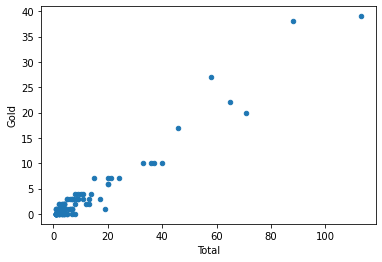

In [25]:
# ScatterPlot
medal_count.plot.scatter(x = 'Total', y = 'Gold')

<AxesSubplot:xlabel='Gold', ylabel='Silver'>

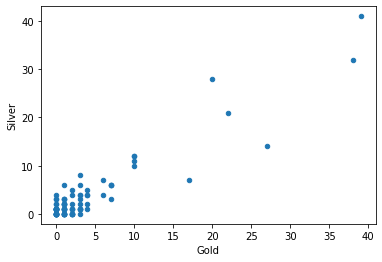

In [26]:
medal_count.plot.scatter(x = 'Gold', y = 'Silver')

## Numeri vs numeric data

### Hexogonal Binning using pandas:

If you have a large number of values then scatter plots become too hectic to actually glean any insights from, enter the hexagonal binning plot, One major benefit of hexagonal binning is that, by binning the data, the number of points that your computer has to render goes down substantially and offers speed benefits and reduces the sixe of you Jupyter notebooks

<AxesSubplot:xlabel='Gold', ylabel='Silver'>

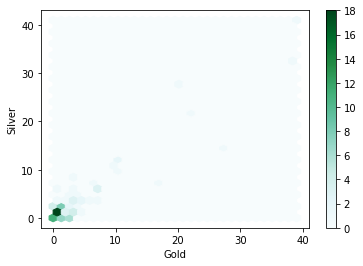

In [27]:
medal_count.plot.hexbin(x = 'Gold',y = 'Silver', gridsize = 30, sharex = False )

## Contour plots

Contour plots are overlaid onto scatterplots and offer a layer of lines that help determine where data is the most dense

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gold', ylabel='Silver'>

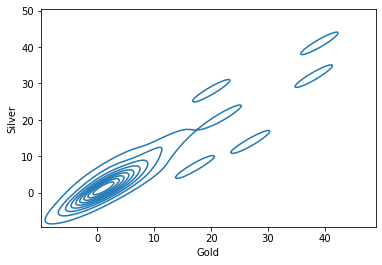

In [28]:
import seaborn as sns
sns.kdeplot(medal_count['Gold'], medal_count['Silver'])

## Heat Maps

Heat maps offer another way to look at data by using colors to communicate densities, Heatmaps can also be used with categorical variables.

https://seaborn.pydata.org/generated/seaborn.heatmap.html

<AxesSubplot:>

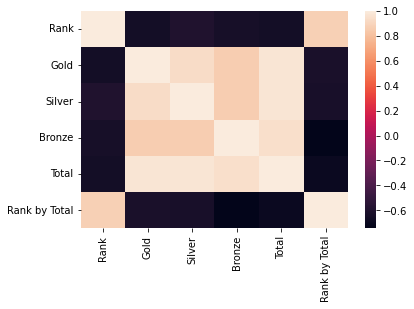

In [29]:
sns.heatmap(medal_count.corr())

# Categorical vs categorical variables

## Contingency tables

Contingency tables count the number of instances of two variables within the dataset. You can also use other metrics like the proportion and percent of each variable combination if you want to as well

You can get the vounts by just vreating a pivot table like so:

In [30]:
medal_count[['Team/NOC','Gold']].pivot_table(index = 'Team/NOC', columns = 'Gold', aggfunc=lambda x: len(x), margins = True).fillna(0)

Gold,0,1,2,3,4,6,7,10,17,20,22,27,38,39,All
Team/NOC,,,,,,,,,,,,,,,
Argentina,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
Armenia,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
Australia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1
Austria,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
Azerbaijan,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Ukraine,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
United States of America,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
Uzbekistan,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [31]:
medal_count[['Silver','Gold']].pivot_table(index = 'Silver', columns = 'Gold', aggfunc=lambda x: len(x), margins = True).fillna(0)

Gold,0,1,2,3,4,6,7,10,17,20,22,27,38,39,All
Silver,,,,,,,,,,,,,,,
0,11.0,7.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24
1,12.0,6.0,3.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26
2,2.0,5.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10
3,2.0,3.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7
4,1.0,0.0,1.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7
5,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
6,0.0,1.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
7,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2
8,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


# Categorical vs Numerical data

Categorical and numerical variables can also be compared through a number of methods.





## Boxplots

You can create a boxplot that is calculated using the numerical variable for each category available.

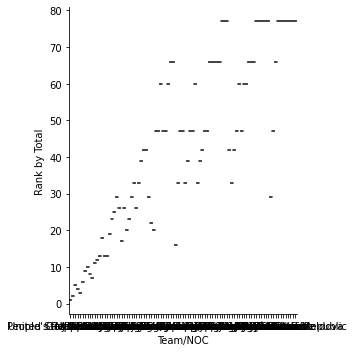

In [32]:
sns.catplot(x="Team/NOC", y="Rank by Total", kind="box", data=medal_count)

## Violin plots

Violin plots are variations of box plots which show the distribution of values within the boxes. This helps to see where the density of values biases

<AxesSubplot:xlabel='Gold'>

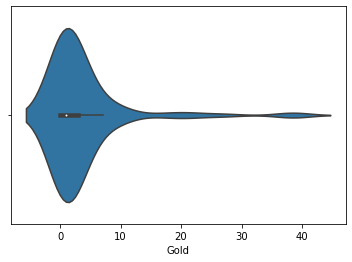

In [33]:
display(sns.violinplot(x = medal_count['Gold']))


<AxesSubplot:>

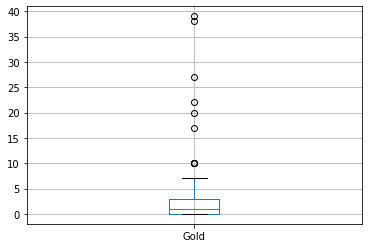

In [34]:
display(medal_count.boxplot(column='Gold'))

## Categorical HeatMaps

https://matplotlib.org/stable/gallery/images_contours_and_fields/image_annotated_heatmap.html

## Visualizing multiple Variables

If you want to compare multiple variables to one another, you can use a Facet or Trellis plot which essentially lines up different variable on the same X and Y and plots them on multiple plots

This function is easily supported using Plotly library

https://plotly.com/python/facet-plots/#:~:text=Python%20with%20Plotly.-,Facet%20and%20Trellis%20Plots,a%20subset%20of%20the%20data.

# Chapter 2 - Data and Sampling Distributions


https://www.kaggle.com/c/nfl-big-data-bowl-2022

# Random Sampling

Sample: A portion of the overall population. Usually taken when it is either too difficult to obtain or precess statistics on the entire dataset

Population: The totality of the dataset available

N(n): Population size

Random Sampling: Creates a samples by randomly picking portions from the population

Stratified sampling: Random samples that are taken after you split the total data into sections or 'Strata' Eg. Splitting population by age

Systematic sampling: Every nth record is chosen from the population to be a part of sampling

Stratus(pl., strata): groups that the data is split into

Simple random sample: Samples the results withou breaking them up into strata


Bias: Systematic error

Sample bias: A sample  that misrepresents the populations

μ : Population mean of your sample  

x̄ : The mean of your sample

# Selection bias

Selection bias: Bias that results from how observations in data are selected

Data Snooping: Searching through data in order to find something interesting within it. To prevent this, its important that you split apart a section of the data so that you have a section that you are not looking at prior to modeling that you can test your model on (test set).

Vast Search Effect: A form of selection bias where one repeatedly runs different models asking different question on a large datset which increases the chances that an outlier is deemed interesting. One way to combat this is to have a holdout set of data that one can test their conclusions on.

Target Shuffling: Target Shuffling is a process for testing the statistical accuracy of data mining results. Another method to combat the Vast search Effect where one creates a model and notes its efficacy, then shuffle the target variable around so you data is 'wrong'. Presumable a model trained on this data will not be very good. Train a model on this data and repeat this process several times and plot the strength(using whatever accuracy metric you want) on histograms. Wherever your original model falls in that distribution is the true significance of you model

https://www.elderresearch.com/resource/innovations/target-shuffling-process/

Regression to the mean: Refers to the phenomenon that extreme observations tend to be followed by ones closer to the mean. This is important to remember as without remembering this, it can be easy to assume that an extreme value obtained early on is representative, when it was just an outlier.

# Sampling Distribution of a Statistic

When working with large amounts of data, sampling becomes very important, and since a sample is not a perfect representation of the population, it is important to understand sampling variability.

In this chapter we are going to be talking a lot about sample statistics, which are statistics that we gather on the sample data. This includes things like the sample mean, sample median etc.

Additionally we will be talking about DATA DISTRIBUTIONS which are frequency distributions of individual values in a dataset.

A Sampling Disctribution is a combination of the two above concepts and is a data distribution of the values of the sampling distribution.

Central Limit Theorem. The means dtawn from multiple samples from the data when plotted, will resemble a bell-shaped normal curve. We can demonstrate this by taking the means of multiple samples of 5 or 20 items and plotting them on a bar chart.

In [35]:
players_data = pd.read_csv('C:/Users/Administrator/Documents/projects/statistics/CHAPTER 2/players.csv')

In [36]:
players_data

,nflId,height,weight,birthDate,collegeName,Position,displayName
0,42901,6-1,208,1992-07-25,James Madison,SS,Dean Marlowe
1,43501,6-0,220,1994-08-11,Central Michigan,FS,Kavon Frazier
2,43534,6-0,205,1993-06-02,Illinois,SS,Clayton Fejedelem
3,43535,6-1,235,1992-12-22,Temple,MLB,Tyler Matakevich
4,44174,6-1,236,1993-02-22,Texas Tech,ILB,Sam Eguavoen
...,...,...,...,...,...,...,...
2727,33216,6-3,320,06/16/1986,Central Florida,G,Josh Sitton
2728,33184,6-3,265,05/02/1985,Winston-Salem State,DE,William Hayes
2729,45651,5-9,198,06/16/1993,Iowa,WR,Riley McCarron
2730,41284,73,230,1992-10-20,LSU,RB,Jeremy Hill


In [37]:
players_data['height_inches'] = players_data['height'].apply(lambda x: int(x.split('-')[0])*12 + int(x.split('-')[1]) if len(x.split('-')) == 2 else int(x))

In [38]:
players_data

,nflId,height,weight,birthDate,collegeName,Position,displayName,height_inches
0,42901,6-1,208,1992-07-25,James Madison,SS,Dean Marlowe,73
1,43501,6-0,220,1994-08-11,Central Michigan,FS,Kavon Frazier,72
2,43534,6-0,205,1993-06-02,Illinois,SS,Clayton Fejedelem,72
3,43535,6-1,235,1992-12-22,Temple,MLB,Tyler Matakevich,73
4,44174,6-1,236,1993-02-22,Texas Tech,ILB,Sam Eguavoen,73
...,...,...,...,...,...,...,...,...
2727,33216,6-3,320,06/16/1986,Central Florida,G,Josh Sitton,75
2728,33184,6-3,265,05/02/1985,Winston-Salem State,DE,William Hayes,75
2729,45651,5-9,198,06/16/1993,Iowa,WR,Riley McCarron,69
2730,41284,73,230,1992-10-20,LSU,RB,Jeremy Hill,73


Text(0.5, 1.0, 'Central Limit Theorem')

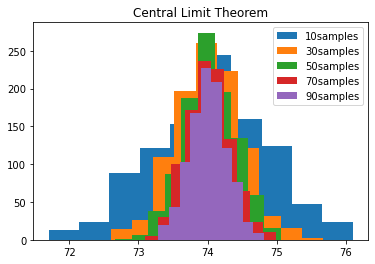

In [39]:
import matplotlib.pyplot as plt

sample_amounts = range(10, 100, 20)

for x in sample_amounts:
    samples = []
    for i in range(1000):
        samples.append(players_data['height_inches'].sample(x).mean())
    plt.hist(samples)
plt.legend([str(z) + 'samples' for z in sample_amounts])
plt.title('Central Limit Theorem')



Standard Error: Single metric that sums up the variability in the sampling distribution for a statistic. You can estimate the standart error based on the standard deviation s and the number of values in the sample n.

SE = sigma / sqrt(n)

From the previous example with the Central Limit theorem, you can see that as we incerase the sample size, the error decreases, as proven by the formula above. You can calculate the standard error in Pandas using

In [40]:
players_data['height_inches'].sem()

0.05065243293253027

In [41]:
players_data.sem()

C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_14072/3630968776.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  players_data.sem()


nflId            92.793692
weight            0.893608
height_inches     0.050652
dtype: float64

Drawing new samples is typically seen as very wasteful and modern statistics favors the boostrap.

The bootstrap: This is a sampling method where we draw resamples from a sample replace the values in the resample back to the sample, then ddraw them again similar to the code we wrote to prove the central limit theorem. There don't have to be any assumptions about the samples being normally distributed. To be clear, if you want to collect a sample of size n, then you will pick a value, record it, put it back, then pick another value until you pick n values, meaning you can pick values more than once. You can implement bootstrapping in python using SkLearn.

In [42]:
from sklearn.utils import resample

result = []

for nrepeat in range(1000):
    sample = resample(players_data['height_inches'])
    result.append(sample.mean())
result = pd.Series(result)
print('Boostrap Statistics: ')
print(f'original: {players_data["height_inches"].median()}')
print(f'bias: {result.mean() - players_data["height_inches"].median()}')
print(f'std. error: {result.std()}')

Boostrap Statistics: 
original: 74.0
bias: 0.011339311859430268
std. error: 0.050830540274873465


# Confidence Intervals

Confidence Level: The percentage of confidence intervals constructed in the same way from the same population that are expected to contain the statistic of interest.

Confidence Intervals: The interval that contains x% of the bootstrapped sample statistic you are gathering. You can calculate this using this methodolgy. 

1. Draw a random sample of size n with replacement(bootsrtapping) from the data
2. Record your sample statistic(mean, median etc)
3. Repeat steps 1-2 multiple times
4. For an x% confidence interval, trim[(100-x)/2]% results off the end of the distribution 
5. The trim points define the bounds of the confidence interval

Confidence intrvals are a great way of determining if more data need to be calculated of if more data needs to be calculated of if more research needs to be done into the phenomenon, if the bounds of the interval are too far apart from one another, then it can be a sign that not enough data war gathered. A large confidence interval can also signal a more variable dataset.

https://www.youtube.com/watch?v=TqOeMYtOc1w

If we want to use Python to calculate the Confidence Interval, then we can use the scipy package

https://www.statology.org/confidence-intervals-python/#:~:text=A%20confidence%20interval%20for%20a,a%20certain%20level%20of%20confidence.

In [43]:
import scipy.stats as st

# define sample data
data = players_data['height_inches'].sample(20)

# create 95% confidence interval for population mean weight
st.t.interval(alpha=0.95, df=len(data)-1, loc=np.mean(data), scale=st.sem(data))

(71.78464452741886, 74.91535547258113)

Otherwiser we can use the normal distribution as we can assume the sample mean is normally distributed. Remember, this doesn't mean that data itself is normally distributed.

In [44]:
# define sample data
data = players_data['height_inches'].sample(1500)

# create 95% confidence interval for population mean weight
st.norm.interval(alpha=0.95, loc=np.mean(data), scale=st.sem(data))

(73.90163222263179, 74.17170111070153)

# Normal/Gaussian Distribution

**Error**: Difference between an insetance and a predicted average value.
**Standardize**: Method of scaling data up or down such that you can compare it to a normal distribution.
**Z-Score**: Refers to the numner of standard deviation above or below the mean that the value is.

https://www.investopedia.com/terms/z/zscore.asp#:~:text=A%20Z%2Dscore%20is%20a,standard%20deviations%20from%20the%20mean.&text=A%20Z%2DScore%20is%20a%20statistical%20measurement%20of%20a%20score's,in%20a%20group%20of%20scores.

**QQ-Plot**: Otherwise known as a quantile-quantile plot, can be used to determine if a distribution of values is close to a normal distribution. If the QQ-plot is roughly diagonal going upwards left to right then it can be considered a normal distribution. This plot order the z-scores from low to high, plotting the z-score on the y-axis and the x-axis is what quantile(percentile) that ranked valye is in a normal distributioin(theoretically what would the quantile be if the data were normal)

https://data.library.virginia.edu/understanding-q-q-plots/

((array([-2.46203784, -2.12570747, -1.93122778, -1.79044653, -1.67819304,
         -1.58381122, -1.50174123, -1.42869743, -1.36256869, -1.30191411,
         -1.24570419, -1.19317644, -1.14374949, -1.09696931, -1.05247413,
         -1.00997067, -0.96921765, -0.93001393, -0.89218993, -0.85560121,
         -0.82012357, -0.78564937, -0.75208458, -0.71934648, -0.68736185,
         -0.65606548, -0.62539893, -0.59530962, -0.56574992, -0.53667655,
         -0.50804994, -0.47983378, -0.45199463, -0.42450149, -0.39732558,
         -0.37044003, -0.34381966, -0.31744076, -0.29128096, -0.26531902,
         -0.23953472, -0.21390872, -0.18842244, -0.16305799, -0.13779803,
         -0.1126257 , -0.08752455, -0.06247843, -0.03747145, -0.01248789,
          0.01248789,  0.03747145,  0.06247843,  0.08752455,  0.1126257 ,
          0.13779803,  0.16305799,  0.18842244,  0.21390872,  0.23953472,
          0.26531902,  0.29128096,  0.31744076,  0.34381966,  0.37044003,
          0.39732558,  0.42450149,  0.

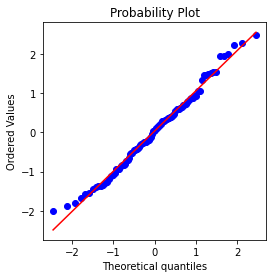

In [45]:
from scipy import stats

fig, ax = plt.subplots(figsize=(4,4))
norm_sample = stats.norm.rvs(size = 100)
stats.probplot(norm_sample,plot = ax)

((array([-3.19758950e+00, -2.93237785e+00, -2.78437841e+00, -2.67999560e+00,
         -2.59855946e+00, -2.53139899e+00, -2.47402263e+00, -2.42379214e+00,
         -2.37902149e+00, -2.33856546e+00, -2.30160949e+00, -2.26755284e+00,
         -2.23593934e+00, -2.20641415e+00, -2.17869564e+00, -2.15255643e+00,
         -2.12781017e+00, -2.10430217e+00, -2.08190261e+00, -2.06050135e+00,
         -2.04000420e+00, -2.02032992e+00, -2.00140792e+00, -1.98317650e+00,
         -1.96558137e+00, -1.94857451e+00, -1.93211325e+00, -1.91615948e+00,
         -1.90067901e+00, -1.88564107e+00, -1.87101783e+00, -1.85678408e+00,
         -1.84291686e+00, -1.82939524e+00, -1.81620005e+00, -1.80331371e+00,
         -1.79072004e+00, -1.77840415e+00, -1.76635224e+00, -1.75455157e+00,
         -1.74299028e+00, -1.73165738e+00, -1.72054262e+00, -1.70963644e+00,
         -1.69892989e+00, -1.68841463e+00, -1.67808281e+00, -1.66792707e+00,
         -1.65794051e+00, -1.64811661e+00, -1.63844924e+00, -1.62893261e+00,

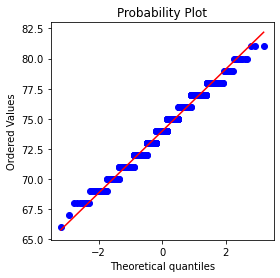

In [46]:
from scipy import stats

fig, ax = plt.subplots(figsize=(4,4))
norm_sample = players_data['height_inches'].sample(1000)
stats.probplot(norm_sample,plot = ax)

# Long-Tailed distributions

Most data will have some sort of skew whether to the left or right. Data that is skewed to the right includes things like incomes.

# Student's t-Distribution

A normal distribution with thicker and longer tails. Tjos is the distribution that sample statistics tend to follow. As you take samples, the distribution will more closely resemble a normal distribution. Remember the graph we created with the Central Limit Theorem

https://www.geeksforgeeks.org/students-t-distribution-in-statistics/#:~:text=Student's%20t%2Ddistribution%20or%20t,the%20pen%20name%20%E2%80%9CStudent%E2%80%9C.



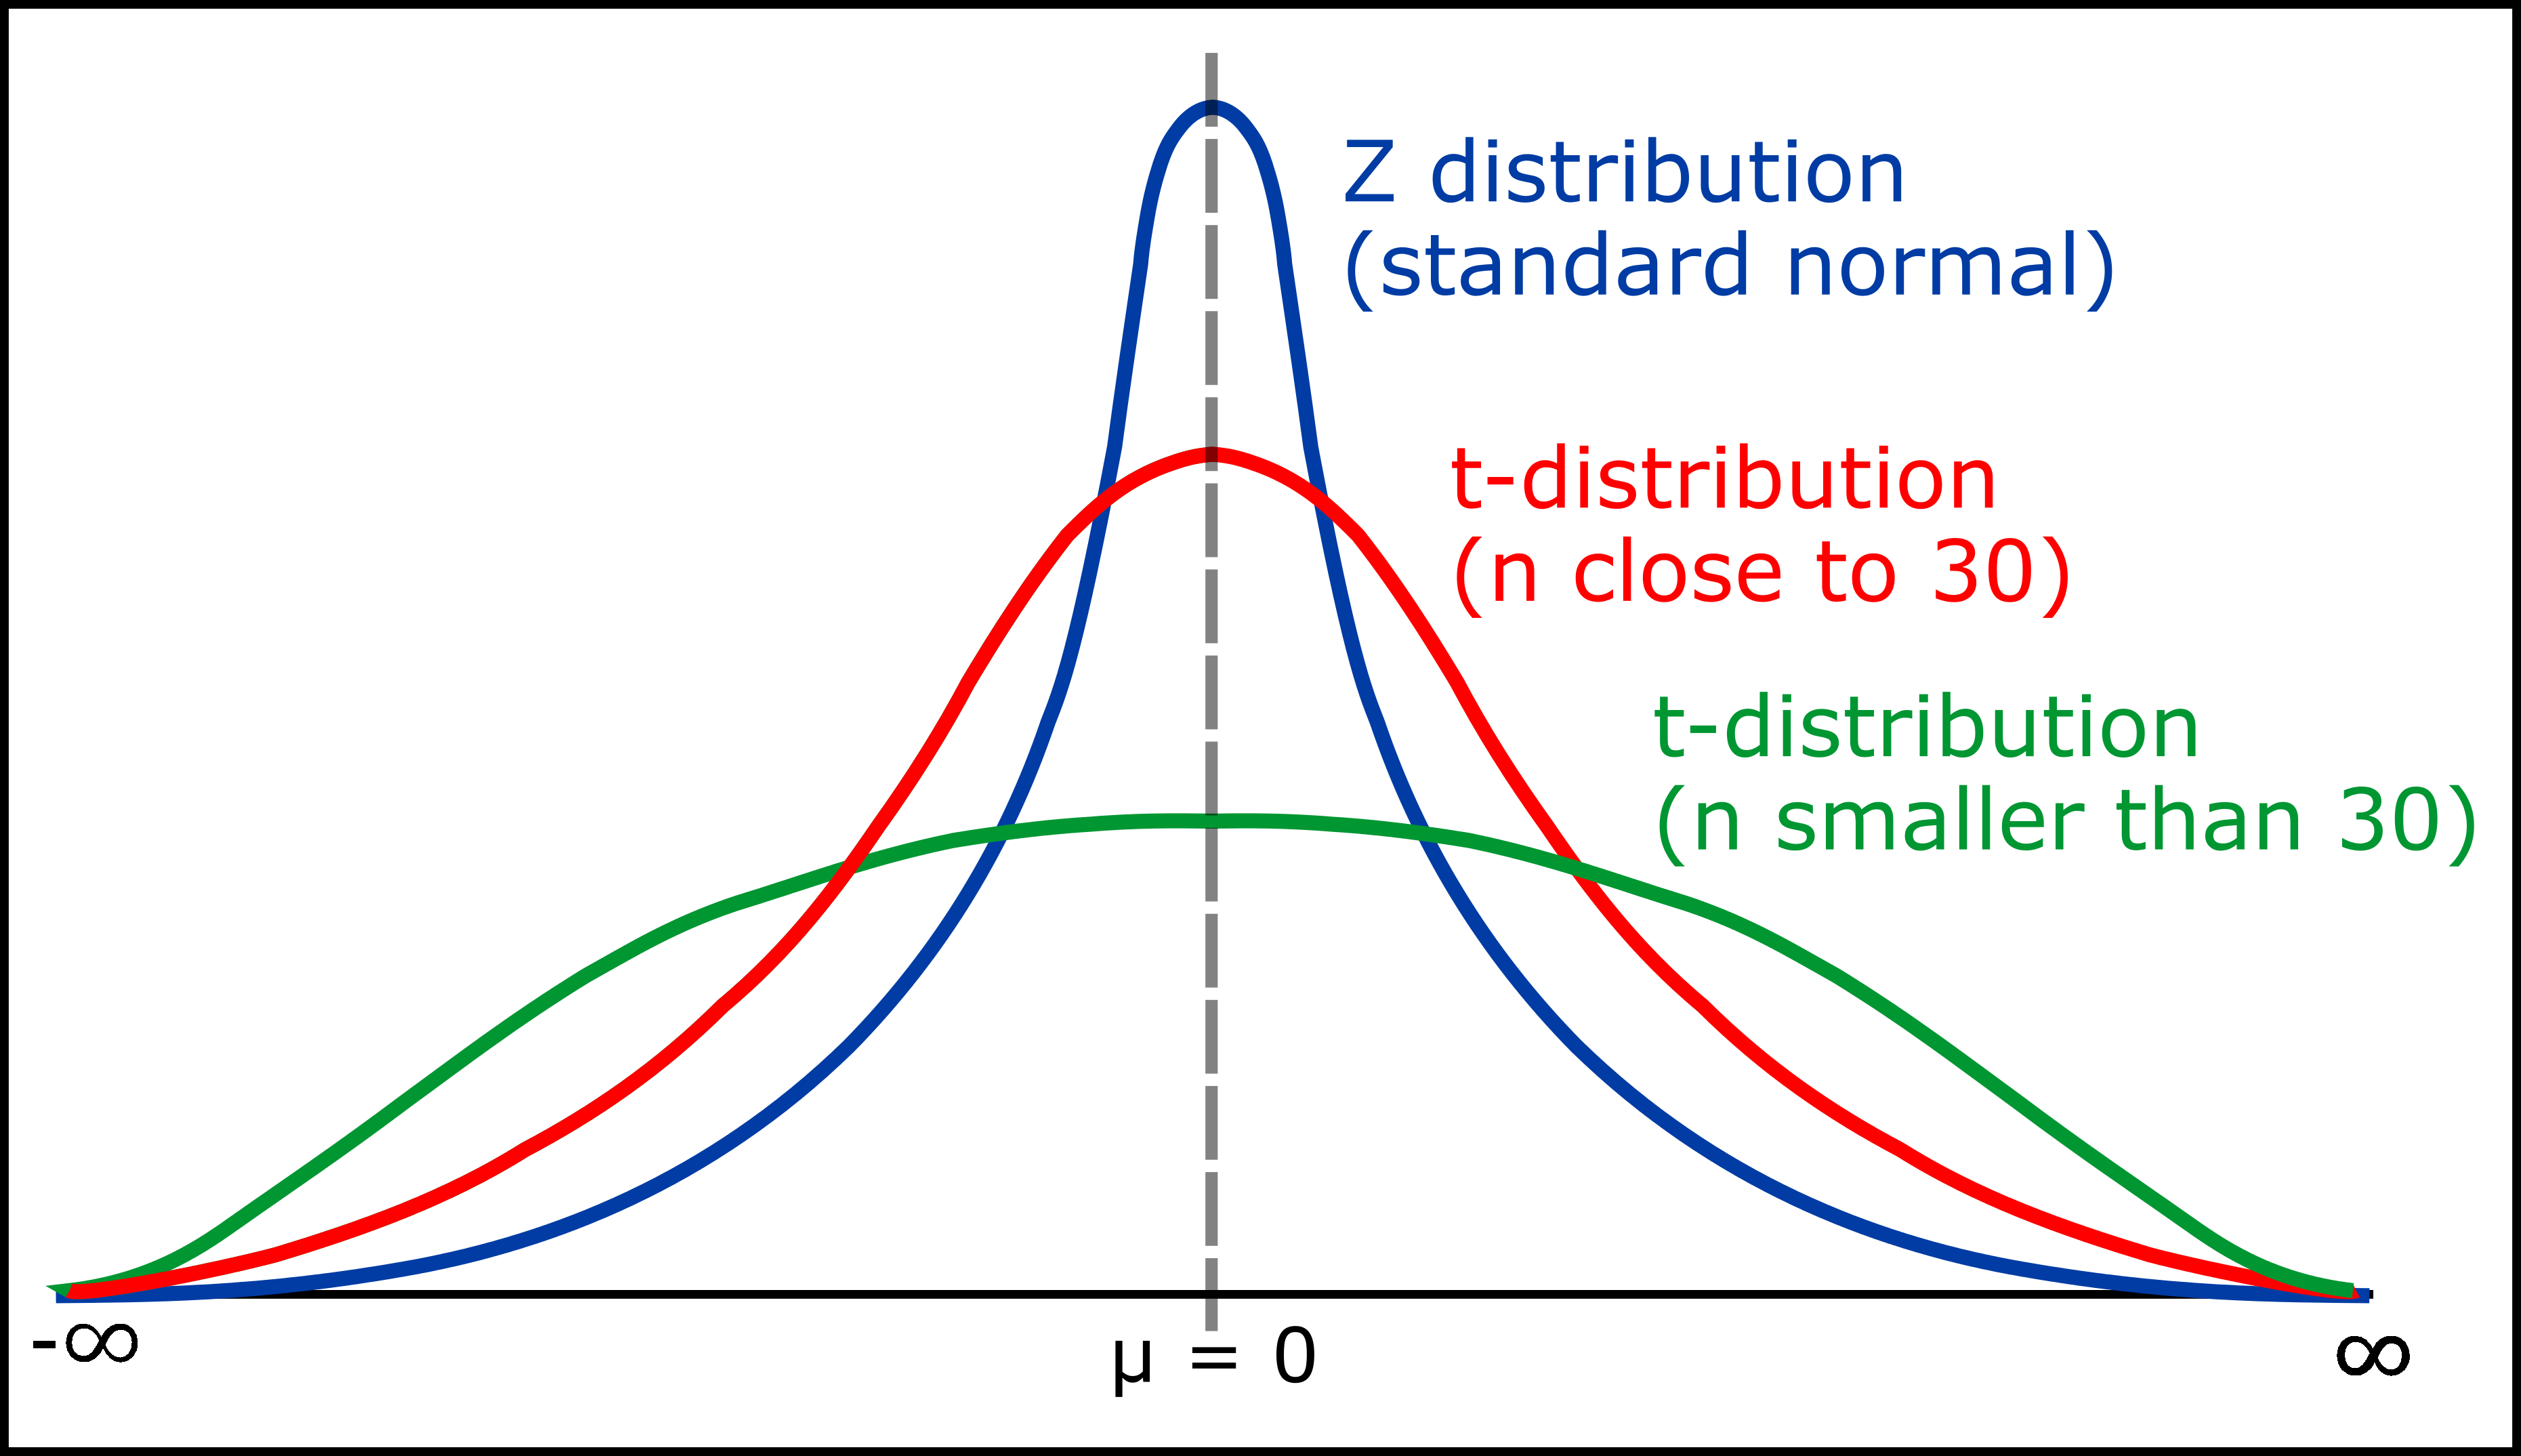

It is call ths student's t-Distribution because W.S. Gosset, its creator was employed by the guinness Brewery at the time of its creation and they didn't want people knowing they were using statistical methods in their brewing so he published under the name Student.


# Binomial Distribution

Binomial distributions are important in Data Science as a lot of usecases for data sciences are binomial, but/don't buy, click/don't click. You can use it to answer the question of how manu successes do you expect givena certain number of trails and a certain probability of success.

The Probability Mass Function(PMF) tells us the probability that an event will happen a certain number of times given a certain number of samples and probability for success while a Cumulative Density Function or CDF tells us the probability that an even will happen a certain number or fewer times.


In [47]:
stats.binom.pmf(2, n=5, p=0.1)

0.07289999999999992

In [48]:
stats.binom.cdf(2, n=5, p=0.1)

0.99144

In the above example

1. 2=number of success we'd like
2. 5=Number of trails we are conducting
3. 0.1=probability of success in each train is 0.1

# Chi-square Distribution

The chi-square statistics measure to what extent results depart from the null expectation of independence, in other wordss, its a way of testing abnormality. We define out expectation as our null hypothesis. 

Low chi-squares indicate that the set of counts closely follows the expected distribution and hight chi-square denote that the counts differ significantly from whats expected.

# F-distribution/ANOVA Testing

Measure of ratio of variability between group means and the variability within each group. This lets us perform an ANOVA test.

# Poisson Distribution

These are used to simulate the probability of a certain number of events happening in a given time or space given that we know the average number of occurrences of that event within a certain time or space and that each instance is not dependent on prior insances.

An example of this would be simulating the number of calls received by a call center each minute of a 100 minute interval if we know that the center receives about 2 calls per minute

Out lambda is 2 in this case, we can simulate this sityation in python using

In [49]:
poisson = stats.poisson.rvs(2,100)
poisson

100

# Exponential Distribution

These are similar in usecase to Poisson distribution except they focus on outputting the time between each occurrence given a mean number of instances per time period and a number of time periods to simulate.


In [50]:
stats.expon.rvs(0.2, size = 100)

array([1.1572555 , 1.40973454, 0.99754546, 0.99874532, 0.61585053,
       0.37694965, 0.84655761, 2.57491611, 3.04322402, 1.17078512,
       3.58413962, 1.35147175, 0.20073959, 0.27112029, 0.26178646,
       3.61602605, 1.30114102, 2.87095855, 0.25621614, 3.1395141 ,
       1.02100588, 0.72160176, 0.41984206, 0.87693318, 0.70977538,
       0.93502722, 0.50756182, 0.65006956, 0.45946746, 1.05124635,
       1.99281206, 0.94690304, 9.42198746, 2.52488102, 1.56685868,
       4.09424546, 1.65619816, 1.53489353, 2.16478164, 2.11011825,
       1.00317608, 0.36944853, 0.29304852, 0.46844052, 0.37640703,
       0.63565536, 1.23230826, 1.92129916, 2.05248924, 1.84440944,
       0.41387067, 3.13483963, 0.97410238, 1.26732443, 0.56278577,
       1.51105293, 0.61837674, 0.6689242 , 0.61302811, 1.43900923,
       1.19975557, 0.94176336, 1.02908762, 1.47506797, 1.77916232,
       0.78543577, 0.83296044, 1.36563592, 0.57046095, 0.50033015,
       3.40629021, 0.24428735, 1.3102198 , 1.18700566, 0.30656

In this instance, we are simulating the number of minutes between phone call assuming that we receive 0.2 calls per minute.

With both this and the chi-squared distribution its important to remember that the rate(lambda) need to be relatively consistent across your time period. This ususlly isn't an issue provided you use a small enough time period.

# Weibull Distribution

As mentioned before, the poisson and exponential distributions are only useful as long as the number of occurrences of an instance are relatively consistent over time, which isn't the vase when talking about things like mechanical failure. Think about it, why is engine mileage such an impoortant metric when determining the price of used cars? Its because parts of a car more likely to fail as more stress is put on them. To simulate things like this, we use a weibull distribution. Its an extension of the Exponential Distribution where the even rate can change through a parameter call the shape parameter beta, if beta>1 then the probability of an event happening increases over time while if beta<1 then the probability decreases over time. There is also the scale parameter eta which is affected by the unit of age whether that be hours, miles, cycles etc.

In [51]:
stats.weibull_min.rvs(1.5, scale=5000, size=100)

array([ 7898.12371555,  1015.0346338 ,  1111.13459181,  4707.05272032,
        7203.24223808,  4197.75587483,  5143.7373973 , 10764.2035636 ,
         838.69937833,  7212.29437933,  5843.0880592 ,  4945.37169144,
         527.99918162, 11780.15913123,  2243.37693491,  5256.43202965,
        5869.99678074,  5762.65824206,  3718.23128089,   643.76253736,
        3527.11069826,  3047.43686636, 10645.10266526,  7131.01863638,
        5625.98071397,  6658.36234856,  3352.87512781,  2091.6663903 ,
        3986.47507125,  3490.58831446,  2784.0297715 ,  3554.39972991,
        4849.75769231,  3709.94163679,  2220.216985  ,  1667.48060627,
        3101.08370735,  6981.25942494,  4887.50404357,  2967.65517282,
        3050.19770584,   290.02288588, 10219.64523287,  2130.52409699,
        7753.11933212,  2918.1107529 ,  3109.42412234,  4752.88128401,
        2759.44218577,  4656.50195984,  1880.79984838,  3694.3919216 ,
        3223.82197008,  2290.99946831,  8344.22615974,  3337.14985457,
      

The above code simulates 100 lifetimes with a shape of 1.5 and a characteristic life of 5000

https://www.livingreliability.com/en/posts/what-is-the-scale-parameter/

# Chapter-3-Statistical Experiments Significance Testing

1. A/B testing
2. Hypothesis testing
3. Sampling
4. Statistical significance and p-valyes
5. t-test
6. Multiple testing
7. Degrees of freedom
8. ANOVA 
9. Chi-Square test
10. Multi-arm bandit algorithm
11. Power and sample size-Power curve and statistical rule of thumb for sample size

# A/B testing

A/B testing is a common tool used to compare tow treatements against some group you are testing against. An interesting example is headlines on news articles, websites will test headlines against on another by showing different headlines to readers of the same article to see which is better. We measure efficacy using something called a test statistic which can be binary in the case of headline example we just covered, or if we are using continuous variables like revenue and measuring how its affected by things like the picture used on a product detail page we might use means to compare the tow classes.

https://blog.tjcx.me/p/new-york-times-ab-testing

If you are trying to test if something is effective independently such as using a drug vs. not using a drug for a treatment, its important to not just test how effective the treatment is, but to have a control group which allows you to test the efficacy of the treatment against a group that represents the norm. As a side-note, the opposite of a control group is a treatment group.

Preferable when doing out treatment, we will want to randomize how the treatment is doled out. This can help prevent biases in how we decide to conduct the experiment.

A/B tests are relatively simple and while useful to data scientists, are only part of a toolbox that includes the much more interesting multi-armed bandit.

https://towardsdatascience.com/ab-testing-with-python-e5964dd66143

https://www.kaggle.com/myzziah/e-commerce-a-b-testing-full-experiment

# Hypothesis test / Significance test

https://towardsdatascience.com/hypothesis-testing-in-machine-learning-using-python-a0dc89e169ce

Hypothesis tests, also called significance tests are designed to help us manage the human tendency to incorrectly understand, interpret, and predict natural random behavior. It does this by testing change due to a phenomenon compared to a baseline of some kind.

We need a null hypothesis and an alternative hypothesis. The null hypothesis generally says that a treatment will cause no difference that can't be attributed to random chance, and the alternative hypothesis says that the difference caused by the treatment is significant. We generally want to prove the null hypothesisi wrong.

https://www.statisticshowto.com/probability-and-statistics/hypothesis-testing/one-tailed-test-or-two/

One more consideration is whether we should run a one or two-tailed hypothesis test. If you look at the image below from statisticshowto.com then you will see a two tailed rejection region(because we are rejecting the null hypothesis) on either side of the graph in yellow. The center is the default mean(what the null hypothesis claims the alternative treatment won't significantly deviate from). In a two-tailed test like the one below, we are typically just testing that the alternative hypothesis is significantly different from the null hypothesis without being too concerned about the direction in which its different. In a one-tailed test, we can also test the direction in which the alternative treatment is different. It is important to understand that the one-tail test also doesn't test either the left or the right side of the graph(of course) so we need to be confident that only one direction away from the mean needs to be tested and that we tested the correct direction. The size of the yellow region is determined by something call alpha value.

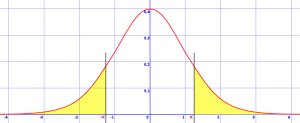

# Resampling

Resampling is the process of repeatedly taking sample values from observed data to assess variability in a statistic. There are two basic types of Resampling.

Boostrapping: Tests the reliability of an estimate. Values are selected with replacement meaning you can select the same instance of a variable more than once.

Permutation Tests: Used to test hypotheses, you will mix groups together and draw samples with sizes equivalent to the original group sizes and then collect your sample statistics on them. The process is outlined below

After repeating the permutation process a few times and creating the constituent histogram of your statistics, then compare the original statistics with the distribution of statistics produced by the permutation method, if they are significantly different then you have proved that there is a sifnificant difference between the two or more groups.

The process outlined above is called a Random permutation test. We can perform something call an Exact/Exhaustive permutation test which will create permutations of every possible combination. This is only possible with small sample as the complexity of running such as test grows exponentially with each new sample.

In [52]:
import pandas as pd
import scipy.stats as ss
import statsmodels.api as sm
import math as mt
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
ab_test_data = pd.read_csv('C:/Users/Administrator/Documents/projects/statistics/CHAPTER 3/ab_data.csv')
ab_test_data

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
...,...,...,...,...,...
294473,751197,2017-01-03 22:28:38.630509,control,old_page,0
294474,945152,2017-01-12 00:51:57.078372,control,old_page,0
294475,734608,2017-01-22 11:45:03.439544,control,old_page,0
294476,697314,2017-01-15 01:20:28.957438,control,old_page,0


In [54]:
# data cleaning procedure from the kaggle workbook

i = ab_test_data[
    (
        (ab_test_data['group'] == 'treatment') == (ab_test_data['landing_page'] == 'new_page')
    )
    == False
].index

df2 = ab_test_data.drop(i)
df2

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
...,...,...,...,...,...
294473,751197,2017-01-03 22:28:38.630509,control,old_page,0
294474,945152,2017-01-12 00:51:57.078372,control,old_page,0
294475,734608,2017-01-22 11:45:03.439544,control,old_page,0
294476,697314,2017-01-15 01:20:28.957438,control,old_page,0


In [55]:
def permutation_function(dataframe, data_col, grouping_col, iterations, statistic_function):
    output = {}
    groups = dataframe[grouping_col].value_counts().index
    values = dataframe[grouping_col].value_counts()
    
    for x in range(iterations):
        for i in groups:
            sample_amount = dataframe[grouping_col].value_counts()[i]
            sample_data = dataframe[data_col].sample(sample_amount, replace = False).to_list()
            sample_metric = statistic_function(sample_data)
            try:
                output[i].append(sample_metric)
            except (KeyError, AttributeError):
                output[i] = [sample_metric]
                
    final_output = pd.DataFrame(output)
    return final_output

In [56]:
permutation_data = permutation_function(df2, 'converted', 'group', 5000, np.mean)
permutation_data

,treatment,control
0,0.119083,0.118610
1,0.118594,0.119953
2,0.119124,0.119044
3,0.120321,0.120207
4,0.120569,0.120015
...,...,...
4995,0.120239,0.120524
4996,0.119000,0.120166
4997,0.120424,0.120441
4998,0.119489,0.118418


<AxesSubplot:>

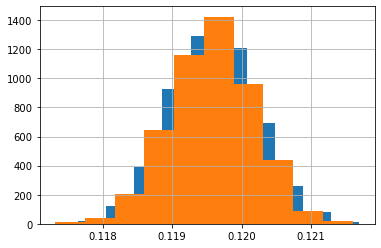

In [57]:
permutation_data['treatment'].hist()
permutation_data['control'].hist()

# Statistical Significance and p-values

Results greater than the realm of chance variation are considered statistically significant.

P-values allow us to more accurately use the Permutation Testing method to determine is a result is within the realm of random chance or if its significant. The p-value represents proportion of times that the chance model(permutation tests) produce results more extreme than the observed result. 

This value can be estimated by taking the proportion of time the Permutation Test produced a result greater than or equal to the observed difference.

Now that we have the p-value, how do we know what is considered an extreme value? We usually set some threshold the p-value need to be greater than prior to our testing. By convention this value is usually 1% or 5% and called the alpha.

**Because it's often misunderstood, i'm going to copy the book's definition of p-value here: The probability that, given a chance model, results as extreme as the observed results could occur.**

https://www.amstat.org/asa/files/pdfs/p-valuestatement.pdf

p-values in academic literature is so graught with misuse that the Americal Satistical Association released the above guidance on properly using them.

**Type-1 Error:** Concluding an effect is real when it is just due to chance(false positive)

**Type-2 Error:** Concluding an effect is not real when it is real(false negative)

Significance testing is designed to protect against type 1 erroes, or thinking something is significant when it could just as easily have been caused by chance.

For data Scientist, p-value serve as one piece of information in determining if the result of model is interesting or not. It shouldn't control the results of your work but the one component of if (in comparison to academia where it is scrutinized moe thoroughly).

# t-Test

The t-test was named after the Student's t-distribution. It was used in a time before researchers and statisticians could run the thousands of permutations necessary for the permutation test. It is used to determine if there's a significant difference between the means of two groups. We first need to determine what alpha value we are looking for, and then calculate our p-value. Lets settle on an alpha of 0.05.

It can be implemented quite easily

In [58]:
res = stats.ttest_ind(df2[df2['group'] == 'control']['converted'], df2[df2['group'] == 'treatment']['converted'], equal_var=False)
print(f'p-value for single sided test: {res.pvalue/2:.4f}')

p-value for single sided test: 0.0948


This code outputs a p-value which we can then compared against our alpha to determine if we can reject or fail to reject the null hypothesis. Running the code we get a p-value of 0.0948 which is greater than the 0.05 we need to reject the null hypothesis, so **we failed to reject the null hypothesis**

**Hypothesis: In order for the p-value to be more extreme than our alpha value, we need it to be lower than it.**

https://www.investopedia.com/terms/t/t-test.asp

# Multiple Testing

With the explosion of avaiable data in the world over the past couple of years, the quote at the begining of these notes is more true than ever. Statistically speaking, if you try hard enough with a large enough dataset, you will find a statistically significant correlation even if none actually exist.

If you have a particularly complicated procedure that you want to test, such as clinical trail where you might be testing result of a therapy at multiple stages, you increase your chances of classifying a chance event as statistically significant. This can be compensated for using statistical adjustments that make the bar for statistical significance more stringent, see Bonferroni's adjustment and Tukey's HSD.

**False Discovery Rate:** Across multiple tests, the rate of making a Type 1 error

**Alpha Inflation:** The multiple testing phenomenon in which the probability of making a Type 1 Error increases as you conduct more tests.

**Adjustment of p-values:** Accounting for doing multiple tests on the same data

There are mutiple ways to handle errors that occur with multiple testing, the methods used by statisticians will differ from the methods used by data scientists though.

When using typical data science methods, you will migrate some of this risk throught cross-validation which tests your algorithm on multiple cuts of the same data, and a holdout set which the algorithm is not trained on and instead is tested on after the fact to ensure you are not overfitting your data.

# Degrees of freedom

Degrees of freedom of a dataset is calculated by taking the number of values N and subtracting 1 from it. The logic being that if you have 10 values and you know 9 of them + the mean, tha 10th value can only be one number. The investopedia article linked has a great alternative explanation of concept.

https://www.investopedia.com/terms/d/degrees-of-freedom.asp#:~:text=Key%20Takeaways-,Degrees%20of%20freedom%20refers%20to%20the%20maximum%20number%20of%20logically,such%20as%20a%20chi%2Dsquare.

We use n-1 in our calculations of sample variance and sample standard deviation. This is because, when taking a sample, out variance or standard deviation will be biased slightly downwards if we use n in the denominator so we free ourselves of that bias using n-1. When working with sufficently large datasets, whether the denominator is n or n-1 wont have a large effect on our results, so it doesn't really matter.

Degree of freedom also explains the dummy variable Trap. This is a situation in which you are taking a categorical vatiable like days of the week and encoding into a numericl variable. You would normally do this through something call One Hot Encoding by basically making n-1 binary variables that represent each category except 1. The reaon we use n-1 is because if we get a 0 value (not this day) for 6 of the days of the week we automatically know that the 7th day of the week is what that record is and having another variable for it would be redundant and lead to a multicollinearity situation. Expand the graphic below if you want to see how the dummy variable tran can be avoided.

# ANNOVA (Analysis Of Variance) Test

**Pairwise Comparison:** Comparision between a summary statistic of different groups

**Omnibus Test:** Single Hypothesis test of the overall variance among multiple group means

**Decomposition of variance:** Separation of components contributing to an individual value

**F-Statistic:** A standardized statistic that measure the extent to which differences among group means exceed what might be expected in a chance model.

The ANOVA(Analysis of Variance) test helps us compare multiple groups or treatments against each other all at once. Let's say we have 4 website designs we sant to check, why can't we just do a pairwise test of every site against another? Remember the multiple testing section of this chapter? If we test enough pairwise group against one another, we might run into a correlation or think significant something that isn't actually significant. An ANOVA test allows us to test for a statistically significant different between groups.

The following is the procedure for an ANOVA test.

1. Combine data from all of the groups togther
2. Shuffle and draw resamples for each group of the same size
3. Record the mean of each group
4. Record the variance among the means of the groups
5. Repeat steps 2-4 times

The proportions of resamples variances that exceed the observed variance is the p-value


In [61]:
four_session = pd.read_csv("C:/Users/Administrator/Documents/projects/statistics/CHAPTER 3/four_sessions.csv")
four_session

,Page,Time
0,Page 1,164
1,Page 2,178
2,Page 3,175
3,Page 4,155
4,Page 1,172
5,Page 2,191
6,Page 3,193
7,Page 4,166
8,Page 1,177
9,Page 2,182


In [64]:
observed_variance = four_session.groupby('Page').mean().var()[0]
print('observed means:', four_session.groupby('Page').mean().values.ravel())
print('Variance:', observed_variance)

def perm_test(df):
    df = df.copy()
    df['Time'] = np.random.permutation(df['Time'].values)
    return df.groupby('Page').mean().var()[0]

perm_variance = [perm_test(four_session) for _ in range(3000)]
print('Pr(prob)', np.mean([var > observed_variance for var in perm_variance]))

observed means: [172.8 182.6 175.6 164.6]
Variance: 55.426666666666655
Pr(prob) 0.07933333333333334


https://www.statisticshowto.com/probability-and-statistics/hypothesis-testing/f-test/

# F-test

Like we have t-testing for the permutation testing, we have the f-statistic for ANOVA testing. The f-statistic is one of the outputs of an ANOVA test. The t-statistic tells us if there is a significant difference between a statistic of two groups  while the f-statistic tells us if a group of variables are significant together. The below code outputs what is called an ANOVA table which has a lot of useful information about the ANOVA test.



In [75]:
import statsmodels.formula.api as smf

model = smf.ols('Time ~ Page', data = four_session).fit()

aov_table = sm.stats.anova_lm(model)
print(aov_table)

res = stats.f_oneway(four_session[four_session.Page == 'Page1'].Time,
                     four_session[four_session.Page == 'Page2'].Time,
                     four_session[four_session.Page == 'Page3'].Time,
                     four_session[four_session.Page == 'Page4'].Time)

print(f'F-statistic: {res.statistic / 2:.4f}')
print(f'P-value: {res.pvalue / 2:.4f}')

            df  sum_sq     mean_sq         F    PR(>F)
Page       3.0   831.4  277.133333  2.739825  0.077586
Residual  16.0  1618.4  101.150000       NaN       NaN
F-statistic: nan
P-value: nan


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3621: F_onewayBadInputSizesWarning: at least one input has length 0
  warnings.warn(F_onewayBadInputSizesWarning('at least one input '


# Chi-Square Test

While ANOVA testing determines if the means between two variables are significantly different, chi-squared testing determines if some data fits ann expected distribution. Let's take our webpage example again. The null hypothesis would be something along the line of 'There is no difference in clickthrough rates between websites A,B,C". Assuming this is true, we would test all three websites on 1000 users a piece and measure the clickthrough counts. Let's say we get 10 click for site A, 50 for site B, 80 for site C, Assuming that out numm hypothesis is true, we expect that the expected clickthrough count for each website will be (10+50+80)/3 = 46.7. We can then calculate the Pearson residual through the formula.

## R = (Observer - Expected)/sqrt(Expected)

The chi-square statistic is the sum of all the squared residuals. This is considered our Observed chi-squared statistic and we can resample to compare the proportion of sum of squared deviations that exceed the oberved to get out p-value.

https://www.statisticshowto.com/residual/

We van use the scipy package to compute the p-value using the chi-square distribution as a reference


In [81]:
clicks_data = pd.read_csv("C:/Users/Administrator/Documents/projects/statistics/CHAPTER 3/click_rates.csv")
clicks_data

,Headline,Click,Rate
0,Headline A,Click,14
1,Headline A,No-click,986
2,Headline B,Click,8
3,Headline B,No-click,992
4,Headline C,Click,12
5,Headline C,No-click,988


In [82]:
clicks = clicks_data.pivot(index = 'Click', columns = 'Headline', values = 'Rate')
clicks

Headline,Headline A,Headline B,Headline C
Click,,,
Click,14,8,12
No-click,986,992,988


In [85]:
Chisq, pvalue, df, expected = stats.chi2_contingency(clicks)
print(f'Observed chi2: {Chisq: .4f}')
print(f'pvalue: {pvalue: .4f}')

Observed chi2:  1.6659
pvalue:  0.4348


If you have a very small number of counts then the chi-square test which is an approximation of the resampling procedure won't work as well as Fisher's Exact Test. There aren't any common libraries to perform Fisher's Test on contingency tables greater than 2x2 in size. You can use the **scipy.stats.fisher_exact** method for 2x2 table.

Classically, Fisher and Chi-square tests were used to see if an effect is real or more likely a product of chance. In data science we typically use Fisher and Chi square tests to better determine if a feature(column) in a dataset has a significant enough effect to warrant further consideration.

# Multi-Arm Bandit Algorithm

Although it sounds complicated, a multi-arm bandit algorithm is just supposed to allow us to pick the most effective treatment from a number of treatments while testing other treatments in order to allow more information to better train our algorithm. In short, if you have treatment A,B and C (let's say they are different headlines to a news article), and we know that A is more effective than B, is more effective than C, instead of just showing people A, we show them A at a higher rate than B, at a higher rate than C in order to use the best headline while continuing to collect information in case conditions change or we did not collect enough information to make a judgement early on.

https://lilianweng.github.io/lil-log/2018/01/23/the-multi-armed-bandit-problem-and-its-solutions.html

https://www.analyticsvidhya.com/blog/2018/09/reinforcement-multi-armed-bandit-scratch-python/

# power and sample size

Power refers to the probability of detecting a given effect size with a given sample size. An effect size is the minimum size of the effect that we hope to be able to detect in a statistical test, basically how much a new treatment needs toimprove outcomes for us to institute the new treatment.

Power is usually used to determine sample sizes. If we want to decide between two ads, and we want to pick Ad B only if there is a 10% greater improvement in it, then we need to determine what sample size will produce results that are signifcant enougn for us to determine this. There are four moving parts we heed to coordinate:

1. Sample size
2. Effect size we want to detect(also called the Minimum Desired Effect or MDE)
3. Significance level(alpha) we are conducting our test at 
4. Power

If we have three, then we can calculate the fourth

In [86]:
effect_size =  sm.stats.proportion_effectsize(0.0121, 0.011)
analysis - sm.stats.TTestIndPower()
result  = analysis.solve_power(effect_size = effect_size, alpha = 0.05, power = 0.8, alternative = 'larger')
print('Sample Size: %.3f' % result)

NameError: name 'analysis' is not defined

# Power Curve

https://machinelearningmastery.com/statistical-power-and-power-analysis-in-python/#:~:text=Statistical%20power%20is%20the%20probability,effect%20size%2C%20and%20statistical%20power.

There is better coverage on methods to calculate statistical power in the link above. A typical default value for power is 0.8. We can also create something called a Power Curve which can help us see the diminishing returns in our power as we iterate through sample sizes.

Text(0, 0.5, 'Power')

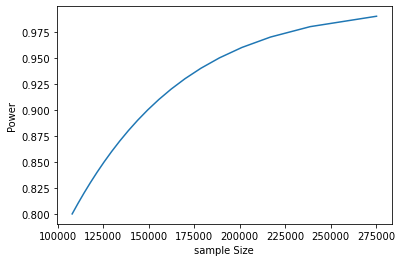

In [90]:
def power_curve(effect_size, current_effect, alpha, power):
    effect_size = sm.stats.proportion_effectsize(current_effect + effect_size, current_effect)
    analysis = sm.stats.TTestIndPower()
    sample_size = analysis.solve_power(effect_size=effect_size, alpha = alpha, power = power, alternative='larger')
    
    return [effect_size, alpha, power, sample_size]

power_curve_results = []

for pow in np.arange(0.8,1.0,0.01):
    power_curve_results.append(power_curve(0.0035, 0.12, 0.05, pow))
    
power_curve_dataframe = pd.DataFrame(power_curve_results, columns = ['effect_size', 'alpha', 'power', 'sample_size'])

plt.plot(power_curve_dataframe['sample_size'], power_curve_dataframe['power'])
plt.xlabel('sample Size')
plt.ylabel('Power')

The above code is one method to create a power curve. As we can see, there is a point of diminishing returns after around 210000 samples.

# Statistical Rule of Thumb for Sample Size

Another method for calculating sample size is a statistical rule of thumb expressed in the kaggle notebook share below

https://www.kaggle.com/myzziah/e-commerce-a-b-testing-full-experiment


In [91]:
def stat_rule_sample_size(current_effect, effect_size):
    return 16*(current_effect*(1-current_effect))/effect_size**2